<a href="https://colab.research.google.com/github/asheetsinvhal/dataAnalytics2020/blob/master/CustomerChurn/Customer%20Churn-Predicting%20dissatisfied%20customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Telco Customer Churn Prediction

A classification problem to assess the propensity of a current customer switching out from the current subscriber.

Dataset Link: https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction?select=WA_Fn-UseC_-Telco-Customer-Churn.csv

In [1]:
# Loading essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

dataset_src = 'https://raw.githubusercontent.com/asheetsinvhal/dataAnalytics2020/master/CustomerChurn/Telco-Customer-Churn.csv'
data = pd.read_csv(dataset_src)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
data[data.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Exploratory Data Analysis

For the purpose of analysing our categorical data we are dropping numerical data.

In [10]:
data_copy = data.copy()
data_copy.drop(['customerID','MonthlyCharges', 'TotalCharges', 'tenure'], axis=1, inplace=True)
data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [11]:
churn_summary = pd.concat([pd.crosstab(data[x], data_copy['Churn']) for x in data_copy.columns[:-1]], 
                          keys=data_copy.columns[:-1])
churn_summary

Churn                                         No   Yes
gender           Female                     2549   939
                 Male                       2625   930
SeniorCitizen    0                          4508  1393
                 1                           666   476
Partner          No                         2441  1200
                 Yes                        2733   669
Dependents       No                         3390  1543
                 Yes                        1784   326
PhoneService     No                          512   170
                 Yes                        4662  1699
MultipleLines    No                         2541   849
                 No phone service            512   170
                 Yes                        2121   850
InternetService  DSL                        1962   459
                 Fiber optic                1799  1297
                 No                         1413   113
OnlineSecurity   No                         2037  1461
                 No internet service        1413   113
                 Yes                        1724   295
OnlineBackup     No                         1855  1233
                 No internet service        1413   113
                 Yes                        1906   523
DeviceProtection No                         1884  1211
                 No internet service        1413   113
                 Yes                        1877   545
TechSupport      No                         2027  1446
                 No internet service        1413   113
                 Yes                        1734   310
StreamingTV      No                         1868   942
                 No internet service        1413   113
                 Yes                        1893   814
StreamingMovies  No                         1847   938
                 No internet service        1413   113
                 Yes                        1914   818
Contract         Month-to-month             2220  1655
                 One year                   1307   166
                 Two year                   1647    48
PaperlessBilling No                         2403   469
                 Yes                        2771  1400
PaymentMethod    Bank transfer (automatic)  1286   258
                 Credit card (automatic)    1290   232
                 Electronic check           1294  1071
                 Mailed check               1304   308

In [12]:
churn_summary['Churn_Percentage'] = churn_summary['Yes'] / (churn_summary['No'] + churn_summary['Yes'])
churn_summary

Churn                                         No   Yes  Churn_Percentage
gender           Female                     2549   939          0.269209
                 Male                       2625   930          0.261603
SeniorCitizen    0                          4508  1393          0.236062
                 1                           666   476          0.416813
Partner          No                         2441  1200          0.329580
                 Yes                        2733   669          0.196649
Dependents       No                         3390  1543          0.312791
                 Yes                        1784   326          0.154502
PhoneService     No                          512   170          0.249267
                 Yes                        4662  1699          0.267096
MultipleLines    No                         2541   849          0.250442
                 No phone service            512   170          0.249267
                 Yes                        2121   850          0.286099
InternetService  DSL                        1962   459          0.189591
                 Fiber optic                1799  1297          0.418928
                 No                         1413   113          0.074050
OnlineSecurity   No                         2037  1461          0.417667
                 No internet service        1413   113          0.074050
                 Yes                        1724   295          0.146112
OnlineBackup     No                         1855  1233          0.399288
                 No internet service        1413   113          0.074050
                 Yes                        1906   523          0.215315
DeviceProtection No                         1884  1211          0.391276
                 No internet service        1413   113          0.074050
                 Yes                        1877   545          0.225021
TechSupport      No                         2027  1446          0.416355
                 No internet service        1413   113          0.074050
                 Yes                        1734   310          0.151663
StreamingTV      No                         1868   942          0.335231
                 No internet service        1413   113          0.074050
                 Yes                        1893   814          0.300702
StreamingMovies  No                         1847   938          0.336804
                 No internet service        1413   113          0.074050
                 Yes                        1914   818          0.299414
Contract         Month-to-month             2220  1655          0.427097
                 One year                   1307   166          0.112695
                 Two year                   1647    48          0.028319
PaperlessBilling No                         2403   469          0.163301
                 Yes                        2771  1400          0.335651
PaymentMethod    Bank transfer (automatic)  1286   258          0.167098
                 Credit card (automatic)    1290   232          0.152431
                 Electronic check           1294  1071          0.452854
                 Mailed check               1304   308          0.191067

### Visualizations

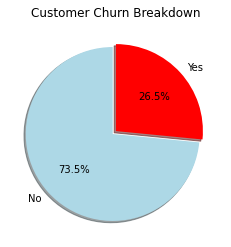

In [13]:
# Plot
p_labels = data['Churn'].value_counts(sort = True).index
p_sizes = data['Churn'].value_counts(sort = True)
p_colors = ["lightblue","red"]
p_explode = (0.05,0)

plt.pie(p_sizes, explode=p_explode, labels=p_labels, colors=p_colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Customer Churn Breakdown')
plt.show()

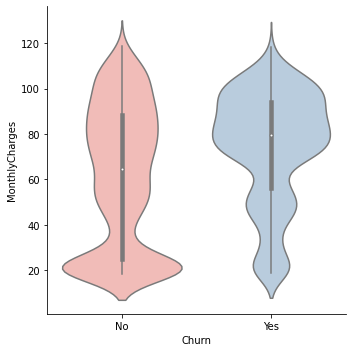

In [14]:
sns.factorplot(x="Churn", y = "MonthlyCharges",data = data, kind="violin", palette = "Pastel1")

#### Churned customers were paying higher monthly charges

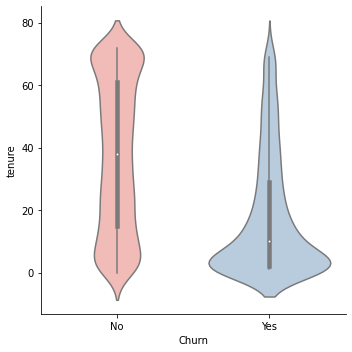

In [15]:
sns.factorplot(x="Churn", y = "tenure",data = data, kind="violin", palette = "Pastel1")

No handles with labels found to put in legend.


([<matplotlib.axis.YTick at 0x7fd07136d390>,
 [Text(0, 0, 'SeniorCitizen'),
  Text(0, 0, 'tenure'),
  Text(0, 0, 'MonthlyCharges')])

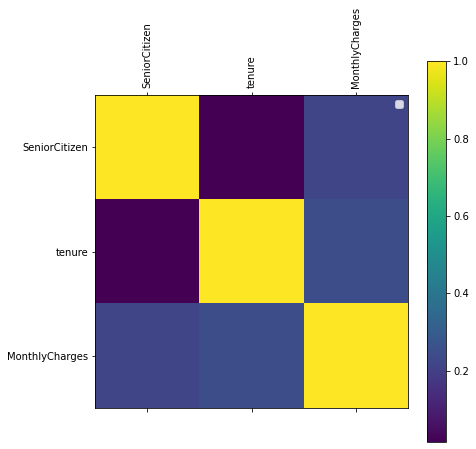

In [16]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(7, 7))
ax.legend()
cax = ax.matshow(corr)
fig.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

### Prepare Data for Machine Learning Classifer

In [17]:
# Check for empty fields, Note, " " is not Null but a spaced character
print(len(data[data['TotalCharges'] == " "]))
print(len(data[data['tenure'] == " "]))

11
0


In [18]:
## Drop missing data
data = data[data['TotalCharges'] != " "]
#Checking results
len(data[data['TotalCharges'] == " "])

0

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

Important learning step to separate categrocal data from numerical data

In [20]:
#customer id col
Id_col = ['customerID']

#Target columns
target_col = ["Churn"]

#categorical columns
cat_cols = data.nunique()[data.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]

#numerical columns
num_cols = [x for x in data.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols = data.nunique()[data.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data, columns = multi_cols )
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [21]:
#Scaling Numerical columns
std = StandardScaler()

# Scale data
scaled_data = std.fit_transform(data[num_cols])
scaled_data = pd.DataFrame(scaled_data,columns=num_cols)

#dropping original values merging scaled values for numerical columns
ml_data = data.copy()
ml_data = ml_data.drop(columns = num_cols,axis = 1)
ml_data = ml_data.merge(scaled_data, left_index=True, right_index=True, how = "left")

ml_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [22]:
ml_data.drop(['customerID'], axis=1, inplace=True)
ml_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [23]:
ml_data[ml_data.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
7032,1,1,0,0,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,NaN,NaN,NaN
7033,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,NaN,NaN,NaN
7034,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,NaN,NaN,NaN
7035,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,NaN,NaN,NaN
7036,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,NaN,NaN,NaN
7037,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,NaN,NaN,NaN
7038,1,0,1,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,NaN,NaN,NaN
7039,0,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,NaN,NaN,NaN
7040,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,NaN,NaN,NaN
7041,1,1,1,0,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,NaN,NaN,NaN


In [24]:
ml_data = ml_data.dropna()
# Re-check that nulls have been removed
ml_data[ml_data.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges


### Modeling

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [0]:
# We assigned those label values to our Y dataset
y = ml_data['Churn'].values
# We remove the label values from our training data
X = ml_data.drop(['Churn'], axis=1).values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Logistic Regression

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy = 0.7807308970099668
[[1356  163]
 [ 299  289]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1519
           1       0.64      0.49      0.56       588

    accuracy                           0.78      2107
   macro avg       0.73      0.69      0.71      2107
weighted avg       0.77      0.78      0.77      2107



Earlier, there was an error at this step-X_train value too large. It was due to non-execution of step 32, where Null values generated after Label encoding were required to be removed.

In [29]:
# Let's see what features mattered most i.e. Feature Importance
# We sort on the co-efficients with the largest weights as those impact the resulting output the most 
coef = model.coef_[0]
coef = [abs(number) for number in coef]
print(coef)

[0.04363913882812389, 0.19118954327737167, 0.24152723946735627, 0.08302947527643369, 0.14801931738873755, 0.2482858407075855, 0.03431319538425769, 0.14811272904105824, 0.11370612200445741, 0.4041627999846019, 0.47267246552272346, 0.06841625388575183, 0.2130708323240586, 0.06841625388575183, 0.14456116678596997, 0.2652015727816313, 0.06841625388575183, 0.19669190724361976, 0.09737332905495277, 0.06841625388575183, 0.028863663516849894, 0.20438015319410305, 0.06841625388575183, 0.13587048765599402, 0.021617602009494957, 0.06841625388575183, 0.09012726754760433, 0.045497645299196934, 0.06841625388575183, 0.1140073108372508, 1.194246312905544, 0.07376598584966525, 1.1203869154035975, 0.14625689570890216, 0.188820111308495, 0.347389424800315, 0.012219006130564205, 0.01366349350594635, 0.06576006486820528, 0.08265524718606462]


In [30]:
cols = list(data.columns)
# Sorting on Feature Importance
sorted_index = sorted(range(len(coef)), key = lambda k: coef[k], reverse = True)
for idx in sorted_index:
    print(cols[idx])

StreamingTV_No internet service
StreamingMovies_No
Churn
TotalCharges
Contract_Month-to-month
InternetService_Fiber optic
tenure
SeniorCitizen
MultipleLines_No phone service
OnlineBackup_No internet service
OnlineSecurity_No
gender
StreamingMovies_Yes
PaperlessBilling
Dependents
StreamingMovies_No internet service
InternetService_DSL
DeviceProtection_No
StreamingTV_No
MonthlyCharges
OnlineSecurity_No internet service
TechSupport_No
Partner
PaymentMethod_Credit card (automatic)
StreamingTV_Yes
MultipleLines_No
MultipleLines_Yes
InternetService_No
OnlineSecurity_Yes
OnlineBackup_Yes
DeviceProtection_Yes
TechSupport_Yes
PaymentMethod_Bank transfer (automatic)
TechSupport_No internet service
customerID
PhoneService
OnlineBackup_No
DeviceProtection_No internet service
Contract_Two year
Contract_One year


### Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
score = model_rf.score(X_test, y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy = 0.7650688182249644
[[1356  163]
 [ 332  256]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1519
           1       0.61      0.44      0.51       588

    accuracy                           0.77      2107
   macro avg       0.71      0.66      0.68      2107
weighted avg       0.75      0.77      0.75      2107



### Using Pycaret

In [32]:
!pip install pycaret

In [33]:
from pycaret.classification import *
customer_df = setup(data_copy, target = 'Churn')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2487
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(7043, 17)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,16
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [34]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.785800,0.000000,0.460300,0.632600,0.532400,0.398100
1,Linear Discriminant Analysis,0.782400,0.822200,0.527500,0.603600,0.562400,0.418600
2,Gradient Boosting Classifier,0.781100,0.822100,0.477900,0.612300,0.536400,0.396100
3,Logistic Regression,0.780700,0.825500,0.490800,0.608100,0.542700,0.400700
4,Ada Boost Classifier,0.780300,0.824500,0.505400,0.603400,0.549500,0.405900
5,Extreme Gradient Boosting,0.778900,0.823300,0.474100,0.607100,0.531900,0.390100
6,Light Gradient Boosting Machine,0.772200,0.806400,0.478700,0.586800,0.526900,0.379000
7,CatBoost Classifier,0.766700,0.797400,0.477900,0.573500,0.521100,0.368600
8,SVM - Linear Kernel,0.760900,0.000000,0.524000,0.557500,0.513900,0.365800
9,Random Forest Classifier,0.755400,0.750300,0.459500,0.547300,0.498900,0.338900


Pycaret module suggests Ridge classifier as the best ML algorithm for our purpose, so we will build our model based on Ridge classifier.

In [35]:
ridge_model = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7931,0.0,0.4615,0.6522,0.5405,0.4120
1,0.7870,0.0,0.4692,0.6289,0.5374,0.4029
2,0.8012,0.0,0.5191,0.6602,0.5812,0.4533
3,0.7830,0.0,0.4962,0.6132,0.5485,0.4078
4,0.7769,0.0,0.4580,0.6061,0.5217,0.3799
5,0.7911,0.0,0.4504,0.6556,0.5339,0.4052
6,0.7688,0.0,0.4198,0.5914,0.4911,0.3470
7,0.7647,0.0,0.4046,0.5824,0.4775,0.3319
8,0.8114,0.0,0.4962,0.7065,0.5830,0.4658
9,0.7809,0.0,0.4275,0.6292,0.5091,0.3746


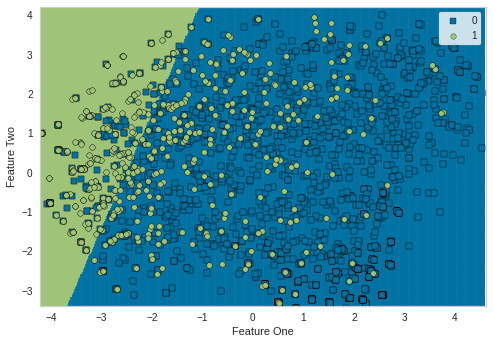

In [36]:
# AUC plot
#plot_model(ridge_model, plot = 'auc')
# Decision Boundary
plot_model(ridge_model, plot = 'boundary')


As our dataset has less number of 'churned' customers,hence our model is not able to classify the results correctly.

We have to use techniques such as SMOTE, to balance our target classes.

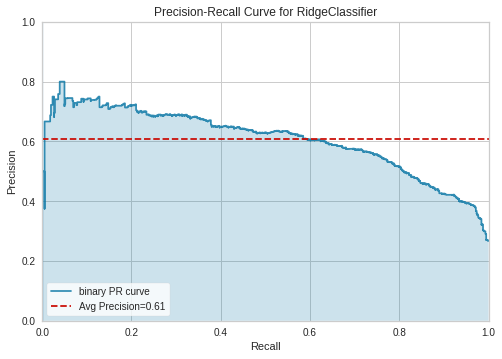

In [37]:
# Precision Recall Curve
plot_model(ridge_model, plot = 'pr')


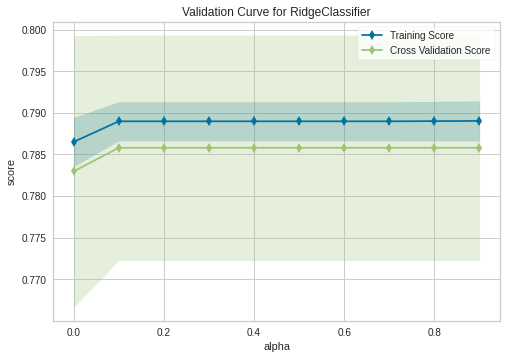

In [38]:
# Validation Curve
plot_model(ridge_model, plot = 'vc')

### Deep Learning

In [0]:
%tensorflow_version 2.x 

In [40]:
# Check to ensure we're using our GPU
import tensorflow as tf
tf.test.gpu_device_name()

''

In [0]:
# Create a simple model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(20, kernel_initializer = "uniform",activation = "relu", input_dim=40))
model.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [42]:
# Display Model Summary and Show Parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                820       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


In [43]:

batch_size = 64
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
77/77 [==============================] - 0s 4ms/step - loss: 0.6071 - accuracy: 0.7375 - val_loss: 0.5371 - val_accuracy: 0.7209
Epoch 2/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7570 - val_loss: 0.4602 - val_accuracy: 0.7703
Epoch 3/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.7837 - val_loss: 0.4489 - val_accuracy: 0.7793
Epoch 4/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.7894 - val_loss: 0.4446 - val_accuracy: 0.7855
Epoch 5/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.7871 - val_loss: 0.4418 - val_accuracy: 0.7826
Epoch 6/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.7877 - val_loss: 0.4424 - val_accuracy: 0.7836
Epoch 7/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.7900 - val_loss: 0.4408 - val_accuracy: 0.7822
Epoch 8/25
77/77 [==

We get a  test accuracy of 79%, which is greater than that achieved by the Ridge classifier.

In [44]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1326  193]
 [ 274  314]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1519
           1       0.62      0.53      0.57       588

    accuracy                           0.78      2107
   macro avg       0.72      0.70      0.71      2107
weighted avg       0.77      0.78      0.77      2107



### Using Checkpoints and Early stopping

In [45]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(2000, activation='relu', input_dim=40, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(1000, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(500, activation = 'relu', kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

# Create our checkpoint so that we save each model after each epoch
checkpoint = ModelCheckpoint("deep_model_checkpoint.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2000)              82000     
_________________________________________________________________
dropout (Dropout)            (None, 2000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [0]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Define our earling stoppping criteria
from tensorflow.keras.callbacks import EarlyStopping 

earlystop = EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 2, #Number of epochs we wait before stopping 
                          verbose = 1,
                          restore_best_weights = True) #keeps the best weigths once stopped

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

In [47]:
batch_size = 32
epochs = 10

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    # NOTE We are adding our callbacks here
                    callbacks = callbacks,
                    validation_data = (X_test, y_test))

score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
154/154 [==============================] - ETA: 0s - loss: 2.7554 - accuracy: 0.7698
Epoch 00001: val_loss improved from inf to 0.51248, saving model to deep_model_checkpoint.h5
154/154 [==============================] - 6s 41ms/step - loss: 2.7554 - accuracy: 0.7698 - val_loss: 0.5125 - val_accuracy: 0.7798
Epoch 2/10
153/154 [============================>.] - ETA: 0s - loss: 0.4997 - accuracy: 0.7788
Epoch 00002: val_loss improved from 0.51248 to 0.49567, saving model to deep_model_checkpoint.h5
154/154 [==============================] - 6s 40ms/step - loss: 0.4992 - accuracy: 0.7792 - val_loss: 0.4957 - val_accuracy: 0.7812
Epoch 3/10
153/154 [============================>.] - ETA: 0s - loss: 0.4920 - accuracy: 0.7794
Epoch 00003: val_loss improved from 0.49567 to 0.48996, saving model to deep_model_checkpoint.h5
154/154 [==============================] - 6s 40ms/step - loss: 0.4923 - accuracy: 0.7794 - val_loss: 0.4900 - val_accuracy: 0.7746
Epoch 4/10
153/154 [=========

With this, the accuracy reduced by 0.5%.